# 亮度和对比度

在Jupyter笔记本中可视化图像时，以读者能够看到我们所写内容的方式显示它们很重要。因此，调整亮度和对比度是很重要的。我们可以通过修改显示范围（显示的灰度值范围）来实现这一点。

为了演示目的，我们使用[scikit-image的cells3d示例图像](https://scikit-image.org/docs/stable/api/skimage.data.html#skimage.data.cells3d)。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.data import cells3d

`cells3d`数据集是一个4D图像。使用数组访问，我们提取一个单独的2D切片并显示它。

In [2]:
image = cells3d()[30,0]
image.shape

(256, 256)

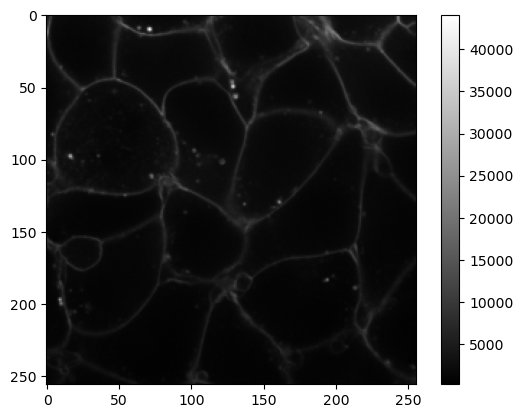

In [3]:
plt.imshow(image, cmap='gray')
plt.colorbar()

注意这里颜色条的范围从0到约45000。matplotlib的`plt.imshow()`函数将图像对比度调整到最小和最大值。

最小和最大像素值也可以这样获得：

In [4]:
min_value = image.min()
max_value = image.max()
print('min value = ', min_value)
print('max value = ', max_value)

min value =  277
max value =  44092


如果我们想增加亮度，即图像发出更多光的感知，我们可以通过设置其最小值`vmin`和最大值`vmax`来配置显示范围。这可以改善膜的可见度。

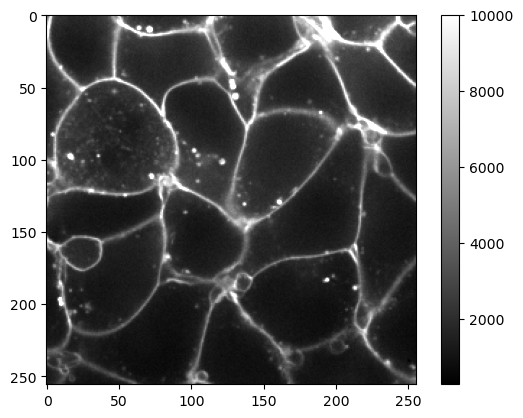

In [5]:
plt.imshow(image, cmap='gray', vmax=10000)
plt.colorbar()

## 独立于特定图像调整可视化
我们下一次打开的图像可能会或可能不会有类似的灰度值范围。因此，我们可以检查图像的直方图并手动猜测一个更好的阈值。

(array([5.8622e+04, 5.6930e+03, 9.7800e+02, 1.6900e+02, 5.5000e+01,
        1.0000e+01, 5.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+00]),
 array([  277. ,  4658.5,  9040. , 13421.5, 17803. , 22184.5, 26566. ,
        30947.5, 35329. , 39710.5, 44092. ]),
 <BarContainer object of 10 artists>)

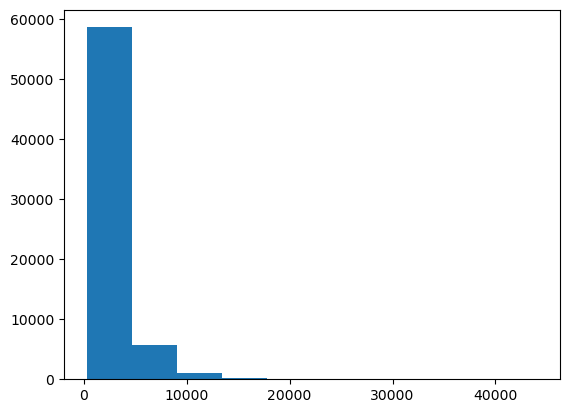

In [6]:
plt.hist(image.ravel())

图像的直方图通常以[对数尺度](https://en.wikipedia.org/wiki/Logarithmic_scale)显示。

(array([5.8622e+04, 5.6930e+03, 9.7800e+02, 1.6900e+02, 5.5000e+01,
        1.0000e+01, 5.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+00]),
 array([  277. ,  4658.5,  9040. , 13421.5, 17803. , 22184.5, 26566. ,
        30947.5, 35329. , 39710.5, 44092. ]),
 <BarContainer object of 10 artists>)

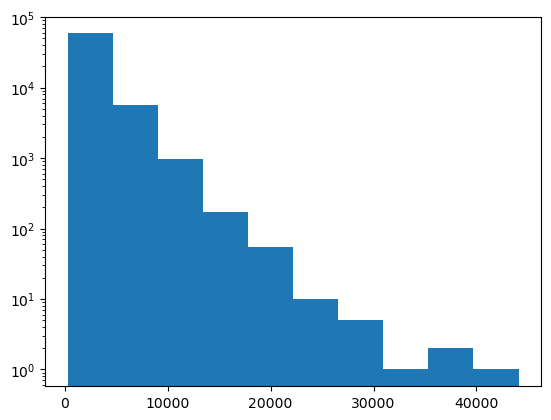

In [7]:
plt.hist(image.ravel(), log=True)

显然，这个图像有很多暗灰色值（< 20000）和少量值 > 40000。

使用百分比来配置可视化可能更有意义。假设我们想要以95%的像素在范围内的方式可视化图像。我们可以使用[numpy的百分位数方法](https://numpy.org/doc/stable/reference/generated/numpy.percentile.html)来做到这一点。我们在学期末还会再次讨论百分位数。

In [8]:
upper_limit = np.percentile(image, 95)
upper_limit

6580.0

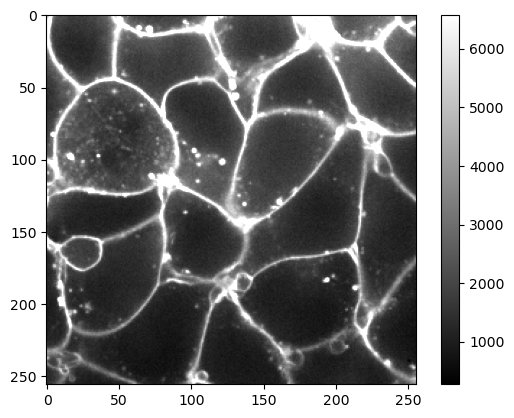

In [9]:
plt.imshow(image, cmap='gray', vmax=upper_limit)
plt.colorbar()

# 练习

`cells3d`数据集包含另一个显示细胞核的通道。将其可视化，使99%的较低灰度值得到适当显示。

In [10]:
nuclei = cells3d()[30,1]
nuclei.shape

(256, 256)